In [1]:
import pandas as pd
import numpy as np
from scipy.io import arff
from scipy.stats import iqr

import os
import math

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

import datetime
import calendar

from numpy import mean
from numpy import std

from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

import joblib

In [2]:
names = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'target']
relax = pd.read_csv('plrx.txt', header = None, sep = '\s+', names = names)

print(relax.shape)
relax.head(2)

(182, 13)


,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,target
0,-0.17936,-0.20700,-0.20971,-0.097260,-0.11921,-0.17322,-0.28076,0.22317,0.418660,-0.032886,0.003383,-0.334250,1.0
1,-0.14659,-0.16494,0.24987,-0.073985,0.49494,-0.15633,-0.28891,0.50080,-0.045553,0.050759,-0.017511,0.066959,1.0


In [3]:
def print_unique(df):
    for col in df.columns:
        print(col, '\n', df[col].sort_values().unique(), '\n')
        
print_unique(relax)

f1 
 [-2.0346e+00 -1.6670e+00 -1.3327e+00 -1.0440e+00 -9.3788e-01 -8.2742e-01
 -8.1333e-01 -7.8399e-01 -7.6348e-01 -7.5407e-01 -7.4731e-01 -7.3740e-01
 -7.1551e-01 -6.7912e-01 -6.7868e-01 -6.5959e-01 -6.5123e-01 -6.3826e-01
 -6.2492e-01 -6.2366e-01 -5.5005e-01 -5.1547e-01 -5.1497e-01 -5.1391e-01
 -4.9114e-01 -4.9008e-01 -4.8175e-01 -4.6684e-01 -4.5771e-01 -4.4622e-01
 -4.4460e-01 -4.2711e-01 -4.0628e-01 -4.0572e-01 -3.9808e-01 -3.9085e-01
 -3.7812e-01 -3.5160e-01 -3.5143e-01 -3.4050e-01 -3.2234e-01 -3.1338e-01
 -3.0140e-01 -2.9303e-01 -2.8879e-01 -2.8839e-01 -2.8724e-01 -2.7390e-01
 -2.6580e-01 -2.6315e-01 -2.5543e-01 -2.3609e-01 -2.3299e-01 -2.2818e-01
 -2.0960e-01 -2.0183e-01 -1.9505e-01 -1.8840e-01 -1.7936e-01 -1.7797e-01
 -1.7167e-01 -1.6820e-01 -1.5180e-01 -1.4910e-01 -1.4659e-01 -1.4648e-01
 -1.3939e-01 -1.3131e-01 -1.2944e-01 -1.2807e-01 -1.2502e-01 -1.1658e-01
 -1.1460e-01 -1.0741e-01 -1.0666e-01 -9.6201e-02 -8.6402e-02 -6.8732e-02
 -6.8616e-02 -5.5702e-02 -5.5436e-02 -5.0902e-

In [4]:
def snapshot(df):
    n_missing = pd.DataFrame(df.isnull().sum(), columns = ['n_missing'])
    pct_missing = pd.DataFrame(round(df.isnull().sum() / df.shape[0], 2), columns = ['pct_missing'])
    dtype = pd.DataFrame(df.dtypes, columns = ['dtype'])
    n_unique = []
    for col in df.columns:
        n_unique.append(df[col].nunique())    
    return pd.DataFrame(n_unique, index = df.columns, columns = ['n_unique']).join(dtype).join(n_missing).join(pct_missing)

snapshot = snapshot(relax)
snapshot

,n_unique,dtype,n_missing,pct_missing
f1,175,float64,0,0.0
f2,176,float64,0,0.0
f3,176,float64,0,0.0
f4,175,float64,0,0.0
f5,176,float64,0,0.0
f6,176,float64,0,0.0
f7,175,float64,0,0.0
f8,176,float64,0,0.0
f9,175,float64,0,0.0
f10,175,float64,0,0.0


In [5]:
features = relax.columns.drop('target')

In [6]:
def plot_single_categorical(df, col):
    plt.figure(figsize = (4, 4))
    df[col].value_counts().plot.bar(color = mcolors.TABLEAU_COLORS)
    sns.despine(top = True)
    
    n_level = df[col].nunique()
    for x_coor in range(n_level):
        plt.annotate(df[col].value_counts().iloc[x_coor], 
                     xy = (x_coor, 
                           df[col].value_counts().iloc[x_coor] + df[col].value_counts().iloc[0]/50))
    
    plt.xticks(rotation = 0)
    plt.grid()
    plt.title(col)
    plt.show()

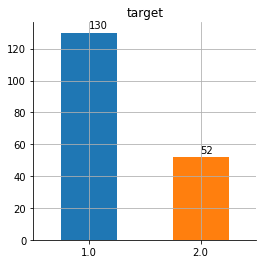

In [7]:
plot_single_categorical(relax, 'target')

In [9]:
def get_mean_std(df):
    mean_col = pd.DataFrame(df.mean(), columns = ['mean'])
    std_col = pd.DataFrame(df.std(), columns = ['std'])
    mean_plus_std = mean_col.join(std_col)
    return mean_plus_std

In [10]:
get_mean_std(relax[features])

,mean,std
f1,-0.009489,0.482749
f2,-0.003306,0.383890
f3,-0.007802,0.343152
f4,-0.012154,0.413270
f5,-0.001945,0.476750
f6,-0.005018,0.404241
f7,-0.007884,0.458312
f8,0.001794,0.387014
f9,-0.006133,0.490317
f10,-0.006127,0.428349


In [11]:
def feat_significance(X, y, n_feat_data_type, features):
    mi_df = pd.DataFrame(mutual_info_classif(X, y, random_state = 42), index = X.columns, columns = ['score'])
    mi_df = mi_df.sort_values(by = 'score', ascending = False)
    
    def color_cell(s):    
        background = []
        for i in range(len(s.index)):
            if s.index[i] in features:
                background.append('background-color: yellow')
            else:
                background.append('')
        return background
    
    if n_feat_data_type == 1:
        return mi_df
    else:
        return mi_df.style.apply(color_cell, axis = 0)

In [12]:
feat_score = feat_significance(relax[features], relax['target'], 1, '')
feat_score

,score
f4,0.036746
f12,0.030949
f2,0.012629
f1,0.011739
f8,0.005000
f3,0.000000
f5,0.000000
f6,0.000000
f7,0.000000
f9,0.000000


In [14]:
lr = LogisticRegression(random_state = 42)
knn = KNeighborsClassifier()
svc = SVC(random_state = 42)
tree = DecisionTreeClassifier(max_features = 'auto', random_state = 42)
alg_dict = {lr: 'lr', svc: 'svc', knn: 'knn', tree: 'tree'}

In [13]:
def num_feat_perform(algorithm, feat_ordered, X_ordered, y, metric):
    scores = []
    for i in range(1, len(feat_ordered)+1):
        pred_data = X_ordered.iloc[:, 0:i]
        score = mean(cross_val_score(algorithm, pred_data, y, scoring = metric, cv = 5))
        scores.append(score)

    n_features = len(feat_ordered)
    plt.plot(np.arange(n_features), scores, marker = 'x')
    plt.xticks(np.arange(n_features), np.arange(1, n_features + 1))
    for i in range(n_features):
        plt.text(i, scores[i], s = round(scores[i], 2))
    plt.grid()
    plt.xlabel('no. of features')
    plt.ylabel('score')
    
def num_feat_multi_alg(alg_dict, feat_ordered, X_ordered, y, metric):
    n_algorithm = len(alg_dict)
    algorithms = list(alg_dict.keys())
    alg_names = list(alg_dict.values())
    if n_algorithm <= 2:
        nrows = 1
        ncols = n_algorithm
        fig = plt.figure(figsize = (ncols * 6, 4))
    else:
        nrows = math.ceil(n_algorithm / 2)
        ncols = 2
        fig = plt.figure(figsize = (12, nrows * 4))

    for n in range(n_algorithm):
        ax = fig.add_subplot(nrows, ncols, n + 1)
        ax = num_feat_perform(algorithms[n], feat_ordered, X_ordered, y, metric)
        plt.title(f"'{alg_names[n]}' performance by '{metric}'")
        
    plt.tight_layout()
    plt.show()

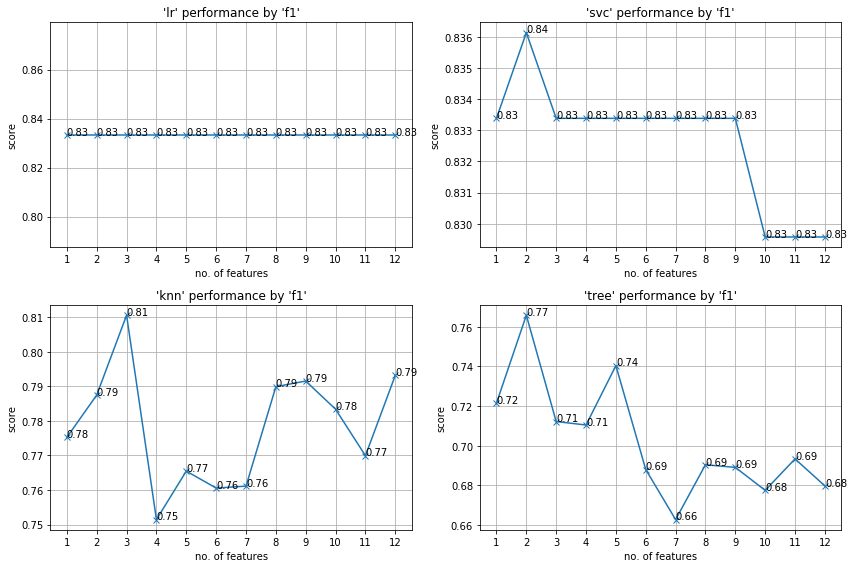

In [16]:
num_feat_multi_alg(alg_dict, feat_score.index, relax[feat_score.index], relax['target'], 'f1')

In [17]:
def plot_learning_curve(train_scores, test_scores, train_sizes):
    train_scores = pd.DataFrame(train_scores, index = train_sizes, columns = ['split1', 'split2', 'split3', 'split4', 'split5'])
    train_scores = train_scores.join(pd.Series(train_scores.mean(axis = 1), name = 'mean'))

    test_scores = pd.DataFrame(test_scores, index = train_sizes, columns = ['split1', 'split2', 'split3', 'split4', 'split5'])
    test_scores = test_scores.join(pd.Series(test_scores.mean(axis = 1), name = 'mean'))

    plt.plot(train_scores['mean'], label = 'train_scores')
    plt.plot(test_scores['mean'], label = 'test_scores')
    plt.legend()
    plt.grid()
    plt.xlabel('no. of training samples')
    
def two_metric_graph(algorithm, X, y):
    train_sizes = np.linspace(start = 20, stop = X.shape[0] * 0.8, num = 6, dtype = int)
    fig = plt.figure(figsize = (10, 4))

    for i, metric in enumerate(['f1', 'balanced_accuracy']):
        train_sizes_abs, train_scores, test_scores = learning_curve(algorithm, X, y, train_sizes = train_sizes, 
                                                                    scoring = metric, cv = 5, shuffle = True, 
                                                                    random_state = 42)
        ax = fig.add_subplot(1, 2, i + 1)
        ax = plot_learning_curve(train_scores, test_scores, train_sizes)
        plt.title(f"'performance by '{metric}'")

    plt.tight_layout()
    plt.show()

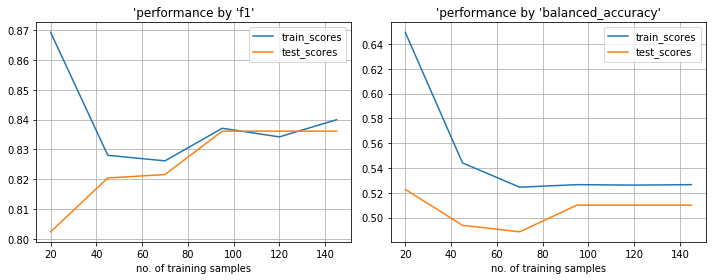

In [18]:
two_metric_graph(svc, relax[feat_score.index[0:2]], relax['target'])

In [19]:
svc.fit(relax[feat_score.index[0:2]], relax['target'])
joblib.dump(svc, 'svc.joblib')

['svc.joblib']